In [172]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### From a list of files, construct the list of tables, and store to variable `database_tables`

In [173]:
from src import transform 
from src import read_log_file as readlog
from src import compare_logs as compare

files = ["datasets/cl_1.log","datasets/cl_3.log","datasets/cl_2.log", "datasets/cl_3.log"]
time_range_seconds = [30, 5000]
database_tables = compare.get_parsed_comparions_from_files(files, time_range_seconds)

### Seperate the stop the world and concurrent events for analysis.
### Use variables `stw_list` and `concurrent_list` 

In [174]:
stw_list, concurrent_list = compare.seperate_pauses_concurrent_lists(database_tables)
#stw_seperated_tables = transform.seperate_by_event_name(stw_table)
#concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


Text(0.5, 1.0, 'Concurrent durations during runtime in miliseconds')

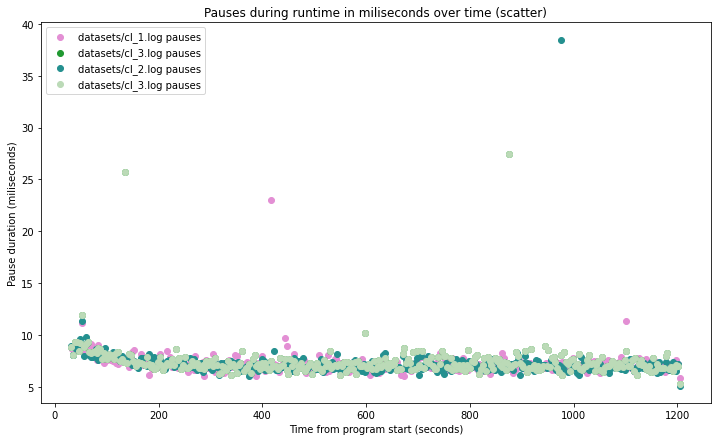

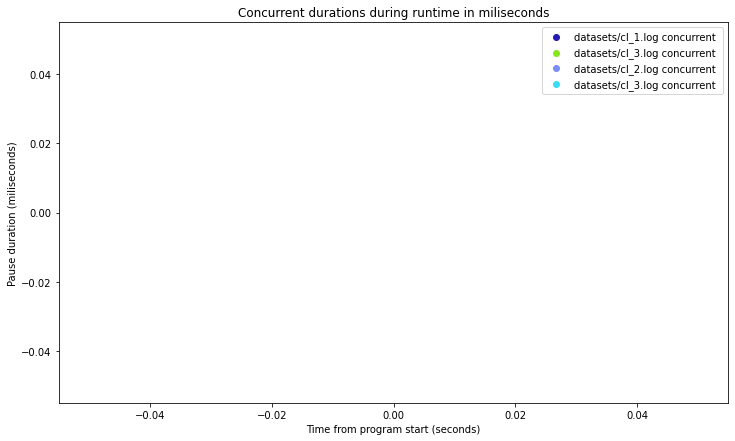

In [175]:
from src.graphing.scatterplot import comparrison_scatter
# Gather the list of timestamp information and event durations
stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_list)
labels = [file + " pauses" for file in files]
plot = comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)


# # Concurrent periods. Use the seperated events to see each type of concurrent duration
c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_list)
labels = [file + " concurrent " for file in files]
plot = comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)
plot.set_title("Concurrent durations during runtime in miliseconds")

### Time spent in Concurrent Phases vs. Stop The World phases

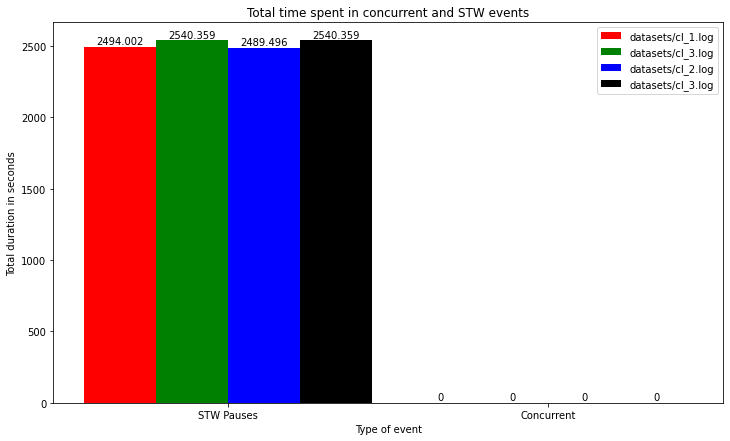

In [176]:
import matplotlib.pyplot as plt
ax = compare.compare_stw_concurrent_durations(database_tables, files)
ax.set_title("Total time spent in concurrent and STW events")
# _ = graph.compare_eventtypes_pie(database_table)
# ax = graph.compare_eventtypes_bar(database_table)
# ax.set_xticks(np.arange(2))


plt.rcParams["figure.figsize"] = [12, 7] # Return figure to default size


### Print trends about the events based on Event Type and Name

In [177]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)

from src.graphing.trends import compare_trends

labels = ["Pauses", "Concurrent"]
# We have two lists to deal with
# STW_listw
# Concurrent_list
linelength = 100
print("\t\t\t   =========== Comparing STW Pauses ===========")
print("-" * linelength)
_, durations_miliseconds_stw = compare.get_time_and_event_durations_from_lists(stw_list)
compare_trends(durations_miliseconds_stw, labels = files)
print("\n\n")



print("\t\t\t =========== Comparing Concurrent Pauses ===========")
print("-" * linelength)
_, durations_miliseconds_c = compare.get_time_and_event_durations_from_lists(concurrent_list)
compare_trends(durations_miliseconds_c, labels = files)

			   =========== Comparing STW Pauses ===========
----------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
datasets/cl_1.log       | 342          | 22.975       | 2494.002     | 7.2924       | 1.0757       | 
datasets/cl_3.log       | 342          | 27.413       | 2540.359     | 7.428        | 1.6253       | 
datasets/cl_2.log       | 342          | 38.474       | 2489.496     | 7.2792       | 1.7949       | 
datasets/cl_3.log       | 342          | 27.413       | 2540.359     | 7.428        | 1.6253       | 



			 =========== Comparing Concurrent Pauses ===========
----------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Du

### Compare percentiles for pauses/concurrent phases, general and specific


In [178]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]
from src.graphing.percentiles import compare_pauses_percentiles

print("\t\t\t=========== Pause percentiles ===========\n")
compare_pauses_percentiles(durations_miliseconds_stw, labels = files)
print("\n\n\n")

print("\t\t\t=========== Concurrent Percentiles ===========\n")
compare_pauses_percentiles(durations_miliseconds_c, labels = files)

			=========== Pause percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
datasets/c | 7.16 ms   | 7.48 ms   | 8.0 ms    | 8.54 ms   | 9.48 ms   | 19.0 ms   | 22.58 ms  | 
datasets/c | 7.16 ms   | 7.65 ms   | 8.31 ms   | 8.55 ms   | 9.88 ms   | 26.82 ms  | 27.35 ms  | 
datasets/c | 7.08 ms   | 7.43 ms   | 7.89 ms   | 8.21 ms   | 9.51 ms   | 29.22 ms  | 37.55 ms  | 
datasets/c | 7.16 ms   | 7.65 ms   | 8.31 ms   | 8.55 ms   | 9.88 ms   | 26.82 ms  | 27.35 ms  | 




			=========== Concurrent Percentiles ===========

pauses_miliseconds not provided to print_percentiles
pauses_miliseconds not provided to print_percentiles
pauses_miliseconds not provided to print_percentiles
pauses_miliseconds not provided to print_percentiles


### Average time in seconds per phase  / grouping

[-0.1, 0.0, 0.1, 0.1, 0.2, 0.30000000000000004, 0.30000000000000004, 0.4, 0.5, 0.5000000000000001, 0.6000000000000001, 0.7000000000000001]


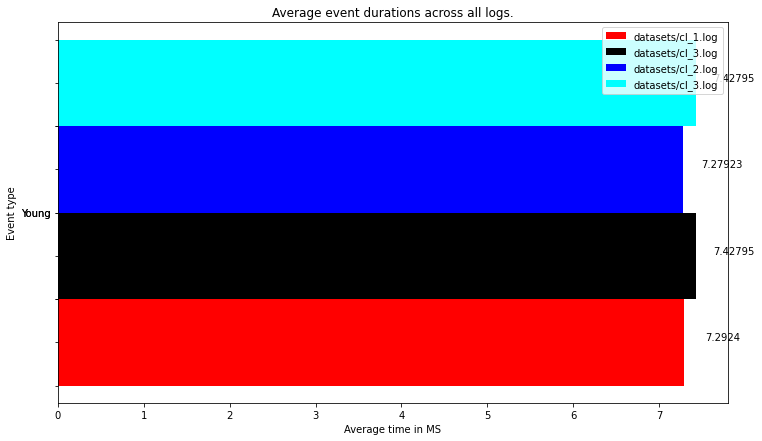

In [187]:

#I need to get the seperated table
from src.compare_logs import extract_events_by_name, compare_events_bar_chart
plt.rcParams["figure.figsize"] = [12, 7] # Return figure to default size
combined_2d_list = extract_events_by_name(stw_list)
compare_events_bar_chart(combined_2d_list, files)


In [ ]:
### Plotting bar lines to display latency: Thicker and taller means longer duration pause.

In [188]:
# Pauses during runtime
from src import graphing as graph

# Stop the world pauses
labels = transform.get_event_table_labels(stw_list)
stw_list = 
labels.reverse() 
graph.compare_paused_running_line(stw_time_lists, stw_duration_lists, None, None, labels, False)

# Concurrent periods
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.compare_paused_running_line(c_time_lists, c_duration_lists, None, None, labels)

NameError: name 'stw_seperated_tables' is not defined

In [ ]:
### Allocation over time

Warning! Maximum heap size must be manually set, and may not be correct.


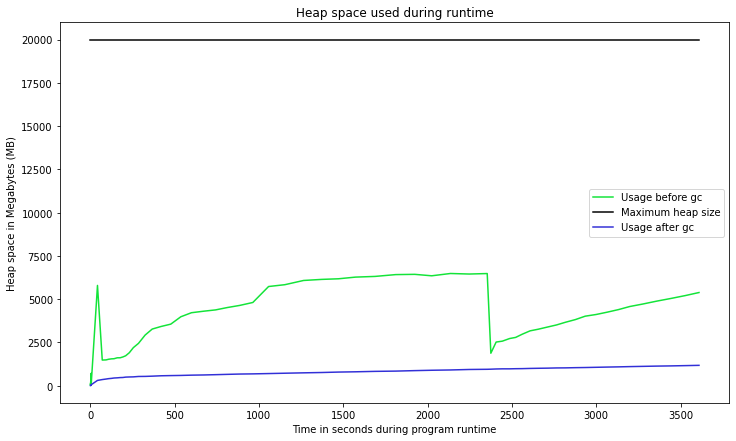

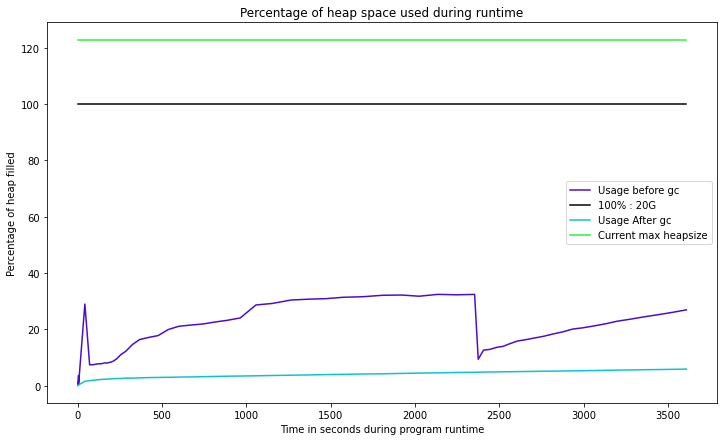

In [ ]:
from src import graphing as graph
# Access the memory changed information 
before_gc, after_gc, max_heap, times_selected = transform.get_heap_occupancy(database_table)
max_heapsize = 20
heapsize_unit = "G"
# TODO: It is possible for the following to all be done with a single function call, since no new data is being created. This can be a second API file
print("Warning! Maximum heap size must be manually set, and may not be correct.")
g = graph.plot_heap_occupancy(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
_ = graph.plot_heap_occupancy(times_selected, after_gc, "M", max_heapsize, heapsize_unit, axs = g, label = "Usage after gc", plot_max=False)
# Create a second graph using percentages
g = graph.plot_heap_occupancy_percentage(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
g = graph.plot_heap_occupancy_percentage(times_selected, after_gc, "M", max_heapsize, heapsize_unit, label = "Usage After gc", axs = g, plot_max = False)
g = graph.plot_heap_occupancy_percentage(times_selected, max_heap, "M", max_heapsize, heapsize_unit, label = "Current max heapsize", axs = g, plot_max = False)
#allo = upl.getHeapAllocation(path1)

In [ ]:
### Reclaimed bytes

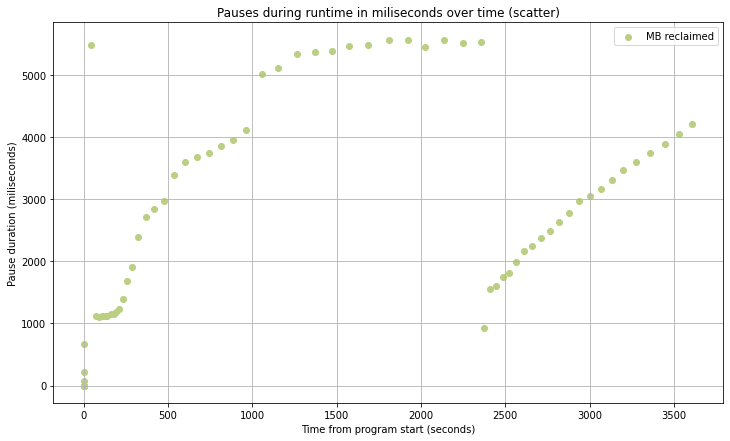

In [ ]:
reclaimed, time_seconds = transform.get_reclaimed_mb_over_time(database_table)
f, axs = plt.subplots()
graph.plot_pauses_scatter(time_seconds, reclaimed, axs=axs, label = "MB reclaimed")

In [ ]:
### Frequencies of STW pauses (X ms buckets)

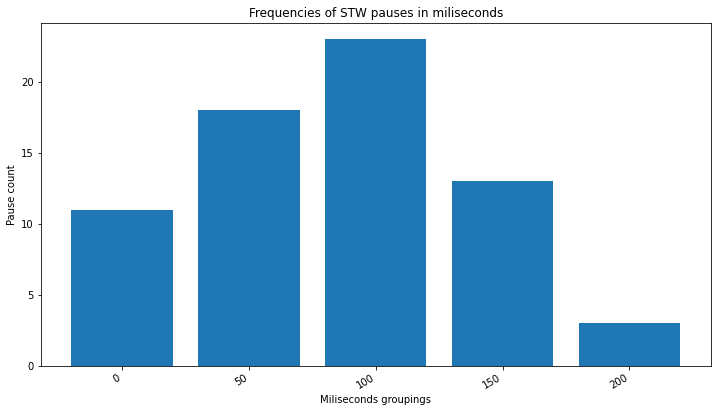

In [ ]:
### Frequencies of STW pauses (X ms buckets)
bucket_size_ms = 50
o = transform.group_into_pause_buckets(stw_table, bucket_size_ms)
#######
fig, ax = plt.subplots()
labels = [str(i * bucket_size_ms)  for i in range(len(o))]
ax.bar(labels, height = o, align = 'center')
ax.set_xlabel('Miliseconds groupings')
ax.set_ylabel("Pause count")
_ = ax.set_title('Frequencies of STW pauses in miliseconds')
fig.autofmt_xdate()
